# Question 18

#### Which code fragment would yield an operator that represents a single-qubit $X$ gate?

## Answer Options

**A.**

    op = Operator.Xop(0)
**B.** 

    op = Operator([[0,1]])
**C.** 

    qc = QuantumCircuit(1)
    qc.x(0)
    op = Operator(qc)
**D.** 

    op = Operator([[1,0,0,1]])

## Question Explanation

The `Operator` Class represents a matrix operator that will evolve a statevector by matrix-vector multiplication.
All gates can be represented by `Operator` objects, because gates each have matrix forms.

The matrix form of the $X$ gate is
$X = \begin{bmatrix} 0&1 \\\\ 1&0 \end{bmatrix}$

## References

* [Qiskit Operator API](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.html?highlight=operator#qiskit.quantum_info.Operator)
* [Qiskit Textbook - Single Qubit Gates](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)

## Correct Answer

**C.** 

    qc = QuantumCircuit(1)
    qc.x(0)
    op = Operator(qc)

## Answer Explanations

### Answer A

`op = Operator.Xop(0)`

The `Operator` class does not have an `Xop()` method.
This code fragment will through an error.

#### Let's take a closer look:

In [1]:
from qiskit.quantum_info import Operator

try:
    op = Operator.Xop(0)
except Exception as e:
    print(f"Exception thrown: {e}")

Exception thrown: type object 'Operator' has no attribute 'Xop'


As you can see, answer A throws an error.

### Answer B

`op = Operator([[0,1]])`

While you can pass the matrix with which to intialize an operator, this code fragment only passes the top row of an $X$ gate as a parameter to the `Operator` constructor.
To return an $X$ gate operator, the code fragment would have to pass `[[0,1],[1,0]]` to represent $\big[\begin{smallmatrix} 0&1 \\\\ 1&0 \end{smallmatrix}\big]$.

#### Let's take a closer look:

In [2]:
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex

op = Operator([[0, 1]])
array_to_latex(op, prefix="\\text{Operator passed}: ")

<IPython.core.display.Latex object>

As you can see, answer B only passes the top half of the matrix for an $X$ gate.

In [3]:
op = Operator([[0, 1], [1, 0]])
array_to_latex(op, prefix="\\text{Operator passed}: ")

<IPython.core.display.Latex object>

Generating an $X$ gate would require an additional row in the matrix passed to the `Operator` constructor.

### Answer C

`qc = QuantumCircuit(1)`  
`qc.x(0)`  
`op = Operator(qc)`  

This answer works a little differently than the other three.
Instead of passing a matrix representing the matrix we want for the operator, this answer passes a `QuantumCircuit` that contains the appropriate gate.
`Operator` can accept a `QuantumCircuit` as a construction parameter, and it will return an `Operator` that represents a matrix that would perform the same operation as that circuit.
Since this code passes a circuit with only a single $X$ gate, that is what the `Operator` object will represent.

#### Let's take a closer look:

In [4]:
from qiskit import BasicAer, QuantumCircuit

qc = QuantumCircuit(1)
qc.x(0)
op = Operator(qc)

As a good sign, this code executed without throwing any exceptions.

If we draw the quantum circuit for `qc`, we confirm the entire circuit only contains a single $X$ gate.

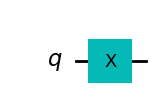

In [5]:
qc.draw("mpl")

Since that is what we passed to the `Operator` constructor, that will be the entire opertion the `Operator` object will represent.

In [6]:
array_to_latex(op, prefix="\\text{Operator passed}: ")

<IPython.core.display.Latex object>

As you can see above, this produced an `Operator` that represents an $X$ gate.

### Answer D

`op = Operator([[1,0,0,1]])`  

While you can pass the matrix with which to intialize an operator, this code fragment passes the entire $X$ gate as a single row matrix as a parameter to the Operator constructor.
To return an $X$ gate operator, the code fragment would have to pass `[[0,1],[1,0]]` to represent $\big[\begin{smallmatrix} 0&1 \\\\ 1&0 \end{smallmatrix}\big]$.
As written, this fragment passes $\big[\begin{smallmatrix} 0&1&1&0 \end{smallmatrix}\big]$.

#### Let's take a closer look:

In [7]:
from qiskit.quantum_info import Operator

op = Operator([[1, 0, 0, 1]])
array_to_latex(op, prefix="\\text{Operator passed}: ")

<IPython.core.display.Latex object>

As you can see, answer D passes a 1x4 matrix instead of a 2x2 matrix.

In [8]:
op = Operator([[0, 1], [1, 0]])
array_to_latex(op, prefix="\\text{Operator passed}: ")

<IPython.core.display.Latex object>

Generating an $X$ gate would require the initial matrix to be broken up into two separate rowns when passing to the `Operator` constructor.